 **TASK - 4 EMAIL SPAM DETECTION WITH MACHINE LEARNING**

We have  all been the recipient of spam emails before. Spam mail, or junk mail is a type of email that is sent to a massive number of users at one time,frequently containing cryptic messages, scams, or most dangerously, phishing contest
In this Project,we use Python to build an email spam detector Then using  machine learning to  train the spam detector to recognize and classify emails into spam and non-spam.

#Email Spam Detection


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/spam.csv",encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#Data Cleaning

In [ ]:
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

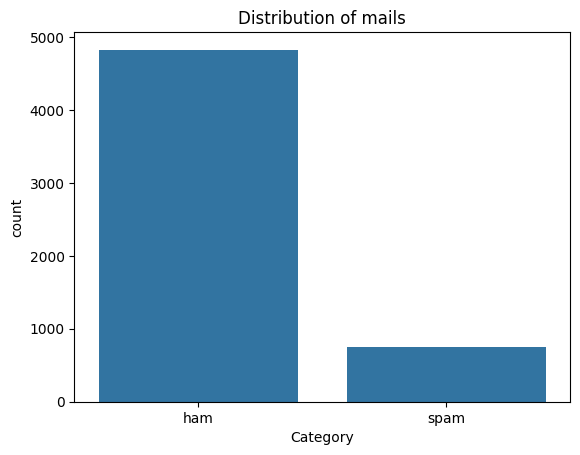

In [ ]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

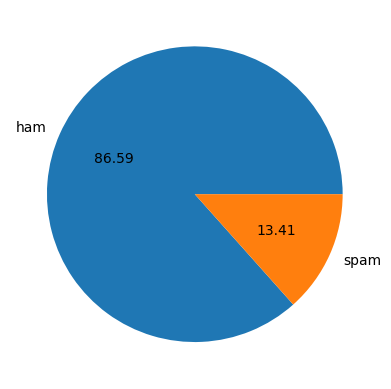

In [ ]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

#Data Preprocessing

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

In [ ]:
X = df["Message"]
Y = df["Category"]

In [ ]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
X.shape

(5572,)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


#Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [ ]:
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [ ]:
X_train

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object

In [ ]:
X_train_features

<4457x7510 sparse matrix of type '<class 'numpy.float64'>'
	with 34758 stored elements in Compressed Sparse Row format>

#Model Selection and Training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

#Model Evaluation

In [ ]:
predict_train_data=model.predict(X_train_features)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9661207089970832


In [ ]:
predict_test_data=model.predict(X_test_features)

In [ ]:
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.9623318385650225


#Testing the model with Email Messages

In [ ]:
new_mail=["Ok then i come n pick u at engin?"]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


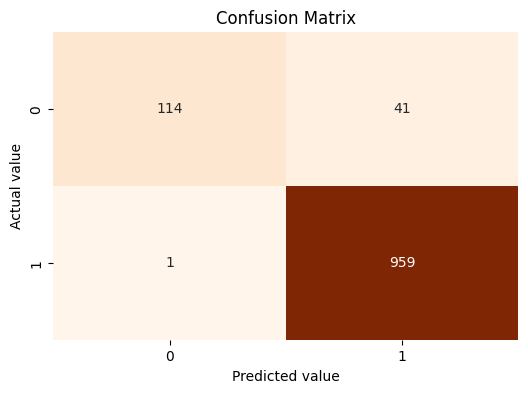

In [ ]:
conf_matrix=confusion_matrix(Y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()